# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**: Kaggle
2. **Nama Dataset**: Abalone
3. **Deskripsi Dataset**: Dataset ini berisikan fitur-fitur dari Abalone yang mungkin memengaruhi Rings (cincin) dari kerang Abalone.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

##Data Loading

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (5).json


{'kaggle (5).json': b'{\r\n  "username": "jeasiepdd",\r\n  "key": "KGAT_1fbc67ac7fddb87aed73f186c6c76a77"\r\n}'}

In [ ]:
# Download kaggle dataset and unzip the file
!mkdir -p ~/.kaggle
!cp "kaggle.json" ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!rm -rf abalone.csv
!rm -rf abalone-dataset.zip

In [ ]:
!kaggle datasets download rodolfomendes/abalone-dataset

Dataset URL: https://www.kaggle.com/datasets/rodolfomendes/abalone-dataset
License(s): other
  0% 0.00/57.3k [00:00<?, ?B/s]
100% 57.3k/57.3k [00:00<00:00, 189MB/s]


In [ ]:
!unzip abalone-dataset.zip

Archive:  abalone-dataset.zip
  inflating: abalone.csv             


In [ ]:
df = pd.read_csv("abalone.csv")
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [ ]:
df.drop(columns=['Sex'], inplace=True)

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

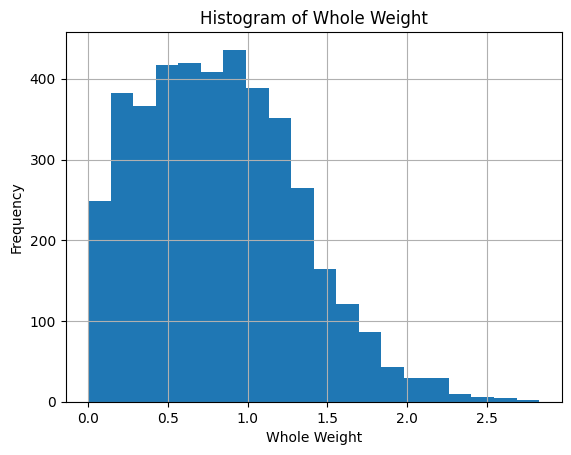

In [ ]:
# Histogram
df['Whole weight'].hist(bins=20)
plt.title('Histogram of Whole Weight')
plt.xlabel('Whole Weight')
plt.ylabel('Frequency')
plt.show()

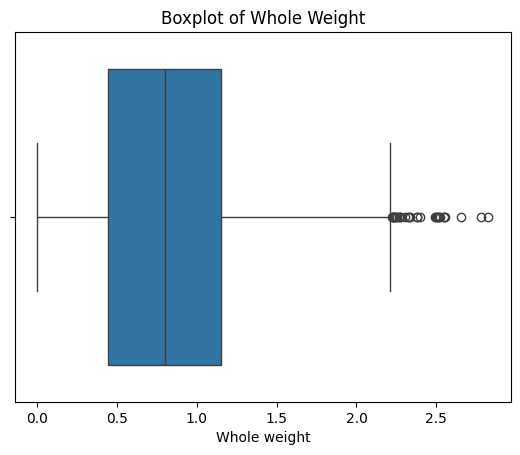

In [ ]:
# Boxplot
sns.boxplot(x=df['Whole weight'])
plt.title('Boxplot of Whole Weight')
plt.show()

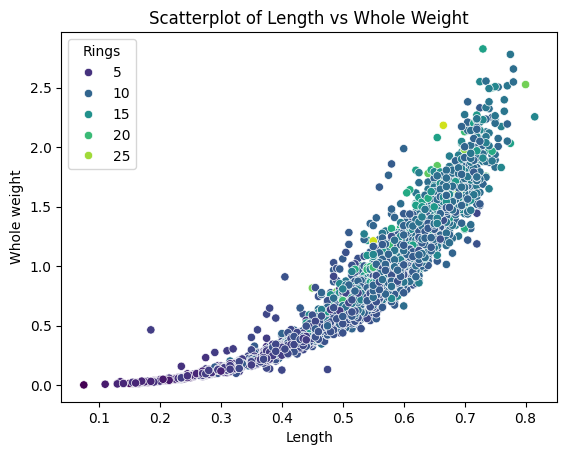

In [ ]:
# Scatterplot
sns.scatterplot(
    x=df['Length'],
    y=df['Whole weight'],
    hue=df['Rings'],
    palette='viridis'
)
plt.title('Scatterplot of Length vs Whole Weight')
plt.show()


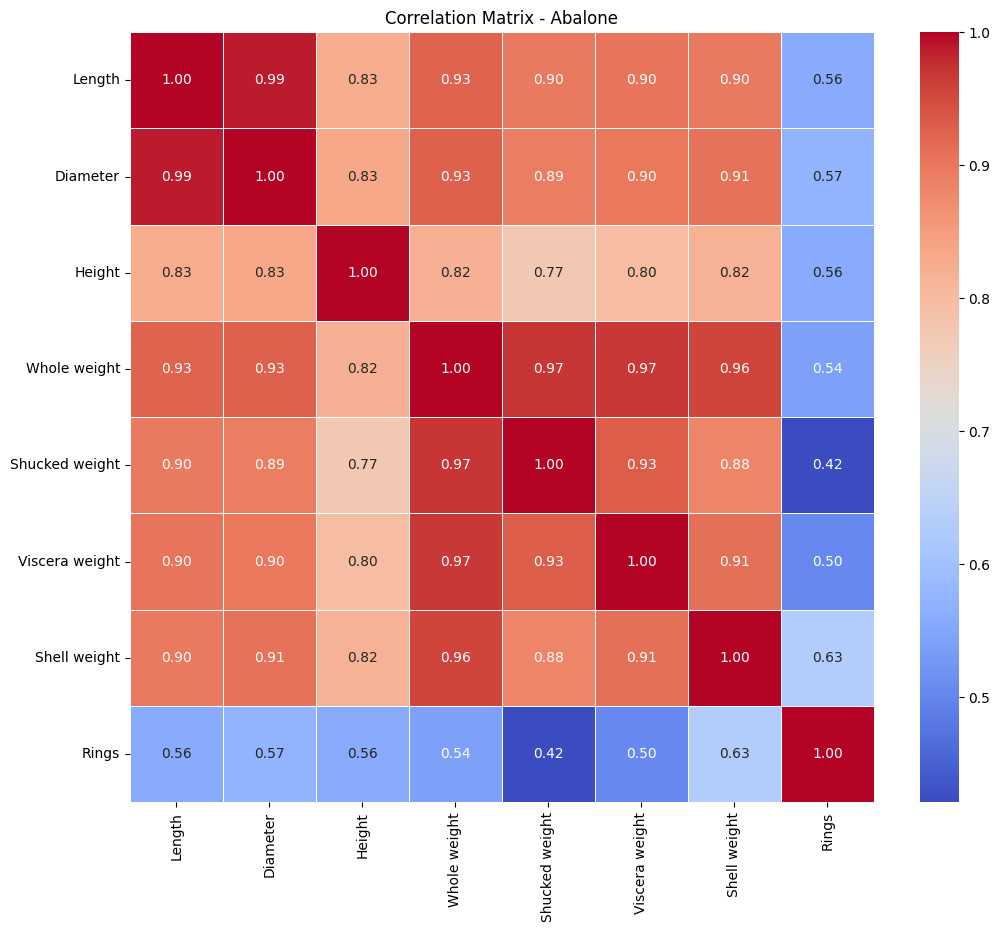

In [ ]:
# Matriks Korelasi
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    linewidths=0.5
)
plt.title('Correlation Matrix - Abalone')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [ ]:
# Mengecek dataset menggunakan isnull().sum()
df.isnull().sum()

,0
Length,0
Diameter,0
Height,0
Whole weight,0
Shucked weight,0
Viscera weight,0
Shell weight,0
Rings,0


In [ ]:
# Mengecek dataset menggunakan duplicated().sum()
df.duplicated().sum()

np.int64(0)

In [ ]:
# Menghapus data duplikat menggunakan drop_duplicates().
df = df.drop_duplicates()
df.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [ ]:
#Memisahkan Fitur dengan Target
X = df.drop('Rings', axis=1)
y = df['Rings']

In [ ]:
# Data Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
)

In [ ]:
# Mengisi NULL dengan Imputasi
imputer = SimpleImputer(strategy='mean')

X_train = pd.DataFrame(
    imputer.fit_transform(X_train),
    columns=X_train.columns,
    index=X_train.index
)

X_test = pd.DataFrame(
    imputer.transform(X_test),
    columns=X_test.columns,
    index=X_test.index
)

In [ ]:
# Mengganti Nilai Outlier
for col in X_train.columns:
    Q1 = X_train[col].quantile(0.25)
    Q3 = X_train[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    X_train[col] = X_train[col].clip(lower, upper)
    X_test[col]  = X_test[col].clip(lower, upper)

In [ ]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
scaler = MinMaxScaler()

X_train_scaled = pd.DataFrame(
    scaler.fit_transform(X_train),
    columns=X_train.columns,
    index=X_train.index
)

X_test_scaled = pd.DataFrame(
    scaler.transform(X_test),
    columns=X_test.columns,
    index=X_test.index
)

print(X_train_scaled.head())

        Length  Diameter  Height  Whole weight  Shucked weight  \
2830  0.526531  0.562189   0.475      0.376847        0.436244   
925   0.371429  0.353234   0.300      0.162338        0.158221   
3845  0.412245  0.402985   0.325      0.185401        0.163276   
547   0.004082  0.014925   0.025      0.018137        0.016176   
2259  0.632653  0.631841   0.600      0.491939        0.510552   

      Viscera weight  Shell weight  
2830        0.360623      0.286396  
925         0.164741      0.164678  
3845        0.193872      0.228321  
547         0.010045      0.022275  
2259        0.506278      0.466985  


In [ ]:
# Download CSV
X_train_scaled.to_csv('X_train_scaled.csv', index=False)
X_test_scaled.to_csv('X_test_scaled.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)